In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
DT = 0.001
MAX_FREQ = 1 / DT
T0 = 0
TF = 1
temp_vector = np.arange(T0, TF, DT)
N = len(temp_vector)
freq_vector = np.fft.fftfreq(n=N, d=DT)
print(f"TEMPORAL RESOLUTION = {DT} s.\nNUMBER OF POINTS = {N}.")
print(f"TIMES : {temp_vector[0]} - {temp_vector[-1]}\nFREQS : {freq_vector[0]} - {freq_vector[-1]}")

FREQS = [5, 10]
FREQS = np.array(FREQS)
PERIODS = 1 / FREQS

print(f"FREQUENCIES: {[f for f in FREQS]} Hz.\nPERIODS: {[p for p in PERIODS]} s.")

AMPLITUDES = [1, 0.1]
AMPLITUDES = np.array(AMPLITUDES)

TEMPORAL RESOLUTION = 0.001 s.
NUMBER OF POINTS = 1000.
TIMES : 0.0 - 0.999
FREQS : 0.0 - -1.0
FREQUENCIES: [5, 10] Hz.
PERIODS: [0.2, 0.1] s.


In [33]:
noise_functions = np.array([np.random.random(size=N) * amp * 2 - amp for amp in AMPLITUDES]) 
noise_total = np.sum((noise_functions), axis=0)

y_functions = np.array([np.sin(2 * np.pi * f * temp_vector) for f in FREQS])
y_clean = np.sum((y_functions), axis=0)
y_noisy = y_clean + noise_total

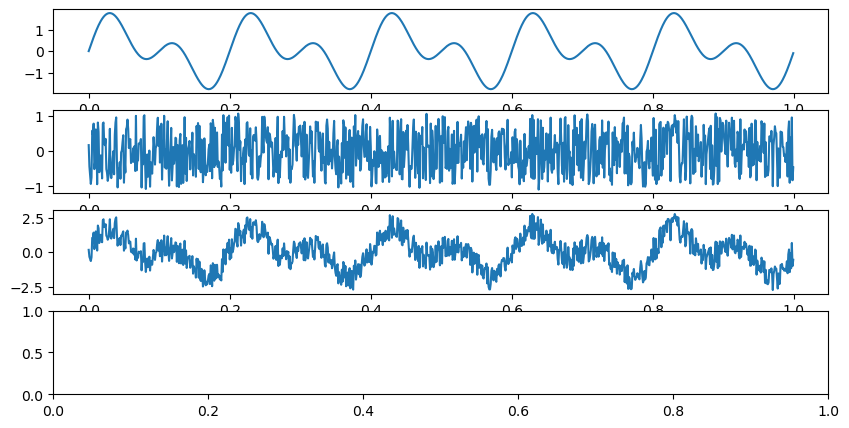

In [34]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(10,5))
axes[0].plot(temp_vector, y_clean)
axes[1].plot(temp_vector, noise_total)
axes[2].plot(temp_vector, y_noisy)
# axes[3].plot(freq_vector, y_noisy)
plt.show()

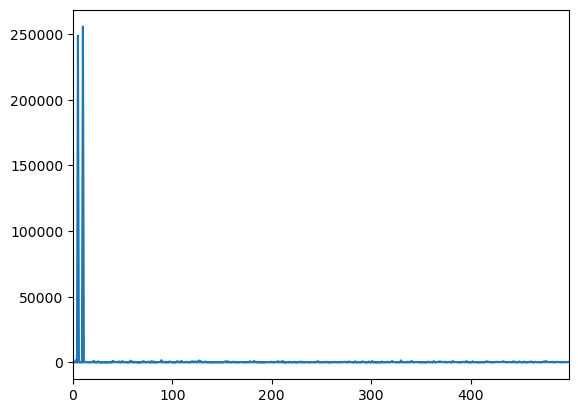

In [36]:
fhat_noisy = np.fft.fft(y_noisy, n=N)
fhat_noisy_real = np.real(fhat_noisy)
fhat_noisy_imag = np.imag(fhat_noisy)
PSD = fhat_noisy * np.conj(fhat_noisy)

plt.plot(freq_vector, PSD)
plt.xlim([0,max(freq_vector)])
plt.show()

In [14]:
PSD[PSD > 1e5]

array([254952.99472497+0.j, 242821.93933662+0.j, 242821.93933662+0.j,
       254952.99472497+0.j])

In [37]:
np.where(PSD > 1e5)

(array([  5,  10, 990, 995], dtype=int64),)

In [38]:
freq_vector[5]

5.0

In [53]:
np.arctan(imag_component_2 / real_component_2)

-1.5666181188040547

In [166]:
import numpy as np
import matplotlib.pyplot as plt

class FFT():
    def __init__(self, temp_resolution=0.001, T0=0, TF=1):
        self.temp_resolution = temp_resolution
        self.time_vector = np.arange(T0, TF, temp_resolution)
        self.N = len(self.time_vector)
        self.freq_vector = np.fft.fftfreq(n=self.N, d=self.temp_resolution)
    
    def generate_signal(self, freqs=[1], noise_amplitudes=[0.1], plot=True):
        y_functions = np.array([np.sin(2 * np.pi * f * self.time_vector) for f in freqs])
        y_total = np.sum((y_functions), axis=0)
        noise_functions = np.array([np.random.random(size=self.N) * amp * 2 - amp for amp in noise_amplitudes])
        noise_total = np.sum((noise_functions), axis=0)
        y_noisy = y_total + noise_total
        self.signal = np.array([self.time_vector, y_noisy])
        if plot:
            self.plot_signal()
            
    def plot_signal(self):
            plt.plot(self.signal[0], self.signal[1])
            plt.show() 
        
    def get_signal(self):
        return self.signal
    
    def do_fft(self, plot=True):
        self.fhat = np.fft.fft(self.signal[1], n=self.N)
        self.PSD = self.fhat * np.conj(self.fhat) / self.N
        if plot:
            self.plot_fft()
            
    def plot_fft(self):
        plt.plot(self.freq_vector, self.PSD)
        plt.xlim([0,max(self.freq_vector)])
        plt.show()


        
    def get_phase(self, z):
        z_real = np.real(z)
        z_imag = np.imag(z)
        phase = np.arctan(z_imag / z_real)
        return phase

    def get_amplitude(self, z):
        z_real = np.real(z)
        z_imag = np.imag(z)
        amplitude = np.sqrt(z_real ** 2 + z_imag ** 2)
        return amplitude

    def get_wave(self, position_time=0, plot=True):
        frequency = self.freq_vector[position_time]
        fourier_coefficient = self.fhat[position_time]
        
        amplitude = self.get_amplitude(fourier_coefficient) / self.N
        phase = self.get_phase(fourier_coefficient)
        
        wave = amplitude * np.cos((2 * np.pi * frequency * self.time_vector + phase))
        
        return wave

    def rebuild_wave(self, position_times=[0,10]):
        rebuild_waves = self.get_wave(position_time=position_times[0], plot=False)
        for pos in position_times[1::]:
            rebuild_waves += self.get_wave(position_time=pos, plot=False)
        plt.plot(self.time_vector, rebuild_waves)
        plt.show()
            
    
    def plot_waves(self, position_times=[0,10]):
        fig, ax = plt.subplots(1,1, figsize=(6,6))
        for pos in position_times:
            ax.plot(self.time_vector, self.get_wave(position_time=int(pos)))
        

In [167]:
fft_1 = FFT()

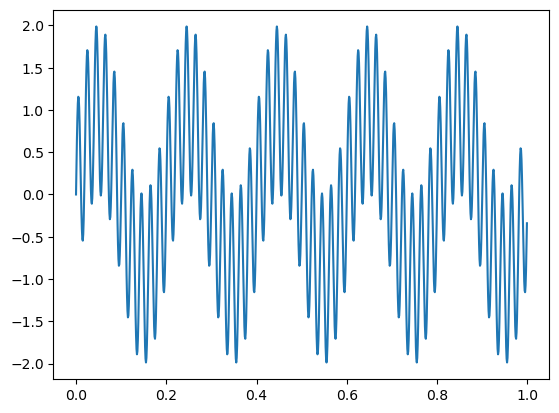

In [172]:
fft_1.generate_signal(
    freqs=[5,50],
    noise_amplitudes=[0],
#     noise_amplitudes=[0.1],
)

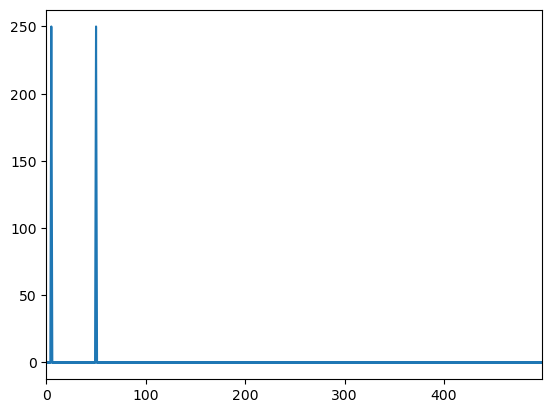

In [173]:
fft_1.do_fft()

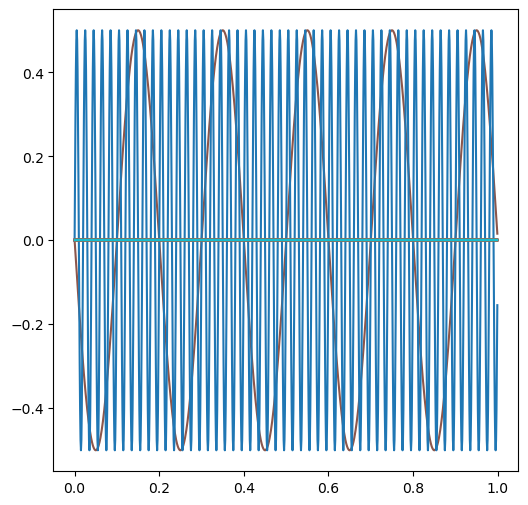

In [176]:
fft_1.plot_waves(np.arange(100))

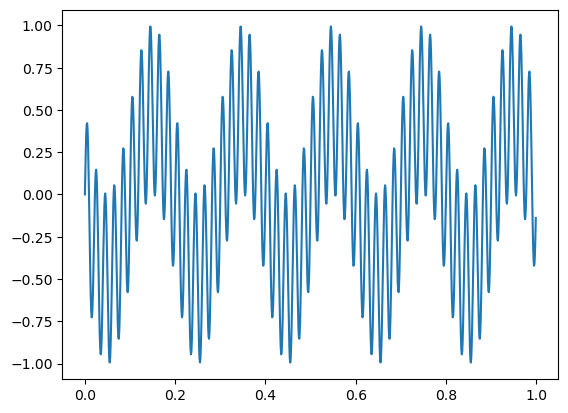

In [178]:
fft_1.rebuild_wave(np.arange(100))

In [17]:
fft_1.signal

array([[ 0.        ,  0.001     ,  0.002     , ...,  0.997     ,
         0.998     ,  0.999     ],
       [ 0.01431593,  0.19056107,  0.2293431 , ..., -0.22183965,
        -0.16031801, -0.13700287]])

In [57]:
def phase(z):
    z_real = np.real(z)
    z_imag = np.imag(z)
    return np.arctan(z_imag / z_real)

def amplitude(z, n):
    return np.sqrt(z * np.conj(z)) / N

def get_wave(temporal_):
    
    
    
    
    DT = 0.001
MAX_FREQ = 1 / DT
T0 = 0
TF = 1
temp_vector = np.arange(T0, TF, DT)
N = len(temp_vector)
freq_vector = np.fft.fftfreq(n=N, d=DT)

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


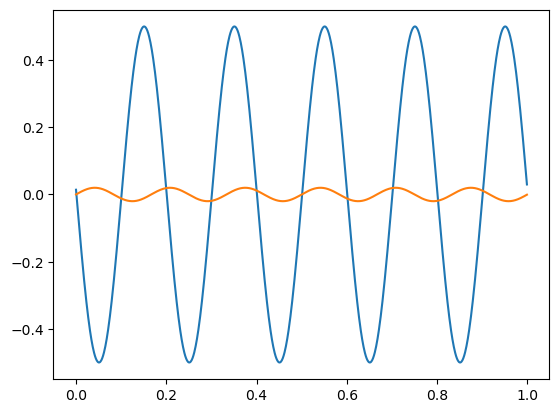

In [55]:
POSITION_1 = 5
POSITION_2 = 6


real_component_1 = np.real(fhat_noisy[POSITION_1])
imag_component_1 = np.imag(fhat_noisy[POSITION_1])

amplitude_1 = np.sqrt(fhat_noisy[POSITION_1] * np.conj(fhat_noisy[POSITION_1])) / N
phase_1 = np.arctan(imag_component_1 / real_component_1)

wave_1 = amplitude_1 * np.cos((2 * np.pi * freq_vector[POSITION_1] * temp_vector + phase_1))

real_component_2 = np.real(fhat_noisy[POSITION_2])
imag_component_2 = np.imag(fhat_noisy[POSITION_2])

amplitude_2 = np.sqrt(fhat_noisy[POSITION_2] * np.conj(fhat_noisy[POSITION_2])) / N
phase_2 = np.arctan(imag_component_2 / real_component_2)

wave_2 = amplitude_2 * np.cos((2 * np.pi * freq_vector[POSITION_2] * temp_vector + phase_2))



plt.plot(temp_vector, wave_1)
plt.plot(temp_vector, wave_2)